In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = sns.load_dataset('titanic')

#### Exploring the data

In [3]:
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.shape

(891, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### Information about data:
* Survived: Survival status (0 = No, 1 = Yes)
* Pclass: Passenger class (1 = 1st class, 2 = 2nd class, 3 = 3rd class)
* Sex: Passenger’s gender
* Age: Passenger’s age
* sibsp: Number of siblings/spouses aboard
* Parch: Number of parents/children aboard
* Fare: Fare paid for the ticket
* Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
* Class: Equivalent to Pclass (1 = 1st class, 2 = 2nd class, 3 = 3rd class)
* Who: Passenger’s category (man, woman, child)
* Adult_male: Whether the passenger is an adult male or not (True or False)
* Deck: Cabin deck
* Embark_town: Port of embarkation (Cherbourg, Queenstown, Southampton)
* Alive: Survival status (yes or no)
* Alone: Whether the passenger is alone or not (True or False)
* Adult_male: Whether the passenger is an adult male or not (True or False)
* Alone: Whether the passenger is alone or not (True or False)
* Alive: Survival status (yes or no)
* Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
* Class: Equivalent to Pclass (1 = 1st class, 2 = 2nd class, 3 = 3rd class)

In [6]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [8]:
(df.isnull().sum() / len(df)) * 100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

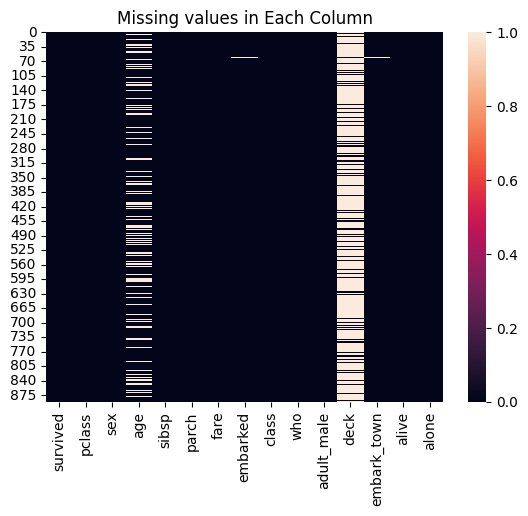

In [9]:
sns.heatmap(df.isnull())
plt.title("Missing values in Each Column")
plt.show()

### Data Cleaning

* We will drop the column deck from our data because it's 77% of values are missing so imputing doesn't seem suitable for that column.

In [10]:
df.drop(columns='deck', axis=1, inplace=True)

* In embarked and embarked_town column we impute the values with mode.

In [11]:
df['embarked'] = df['embarked'].fillna(value=df['embarked'].mode()[0])

df['embark_town'] = df['embark_town'].fillna(value=df['embark_town'].mode()[0])

In [12]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
embark_town      0
alive            0
alone            0
dtype: int64

* In age column we impute null values with it's median. If we impute it's values using mean then it's change it's ditribution.

In [13]:
df['age'] = df['age'].fillna(value=df['age'].mean())

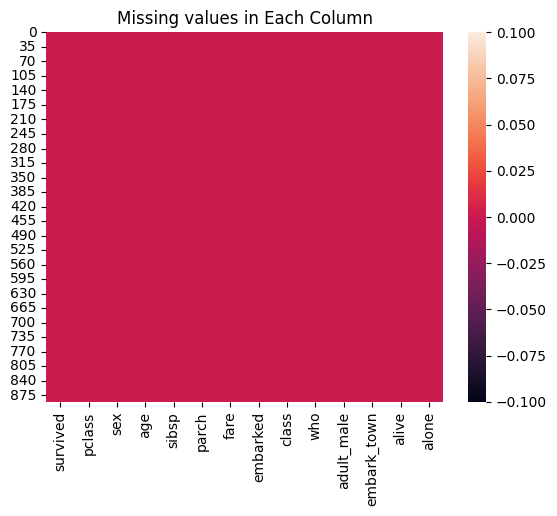

In [14]:
sns.heatmap(df.isnull())
plt.title("Missing values in Each Column")
plt.show()

#### Visualization:

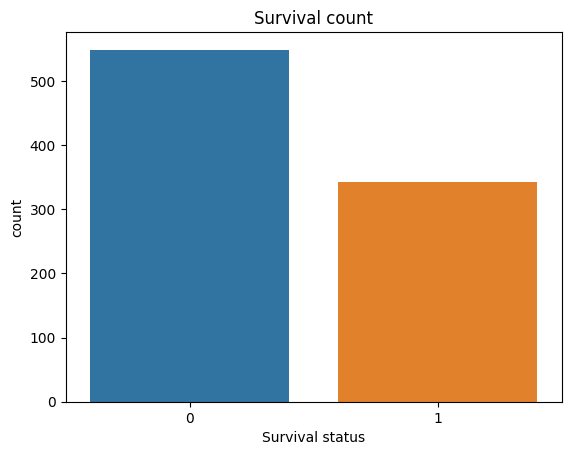

In [15]:
sns.countplot(x=df['survived'])
plt.xlabel('Survival status')
plt.title('Survival count')
plt.show()

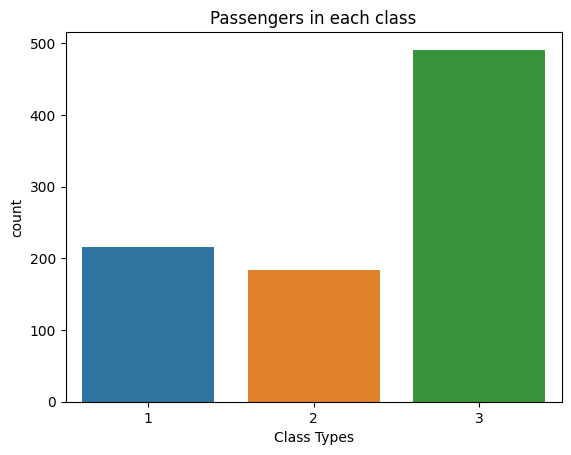

In [16]:
sns.countplot(x=df['pclass'])
plt.xlabel('Class Types')
plt.title('Passengers in each class')
plt.show()

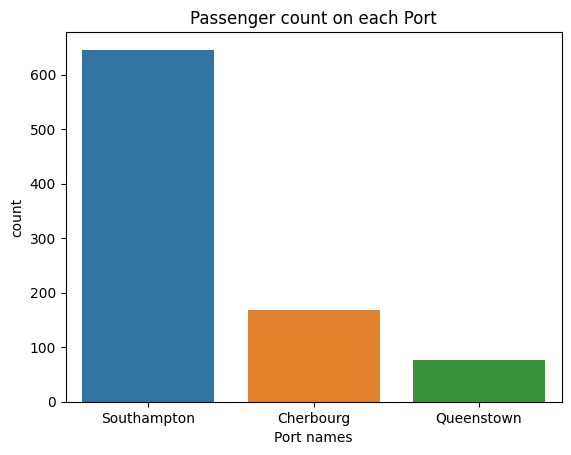

In [17]:
sns.countplot(x=df['embark_town'])
plt.xlabel('Port names')
plt.title('Passenger count on each Port')
plt.show()

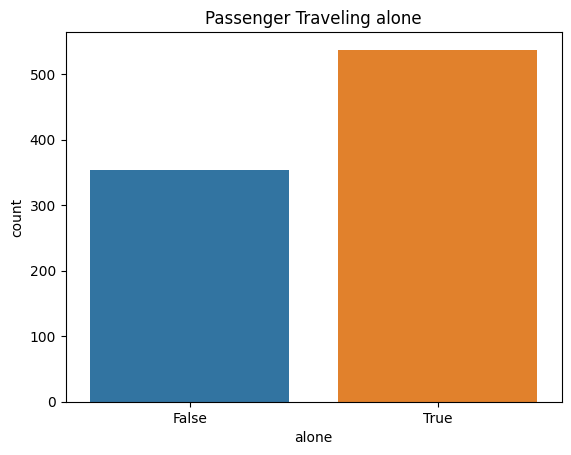

In [18]:
sns.countplot(x=df['alone'])
plt.title('Passenger Traveling alone')
plt.show()

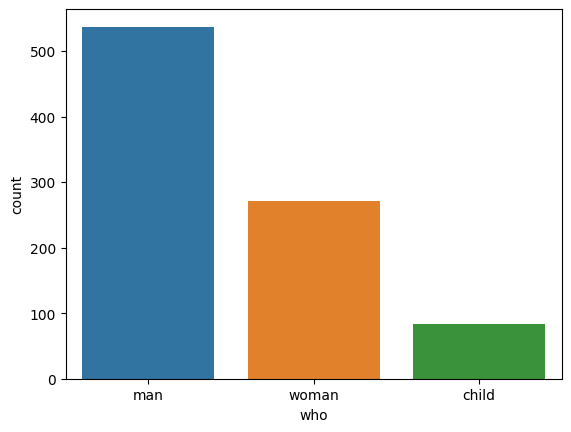

In [19]:
sns.countplot(x=df['who'])
plt.show()

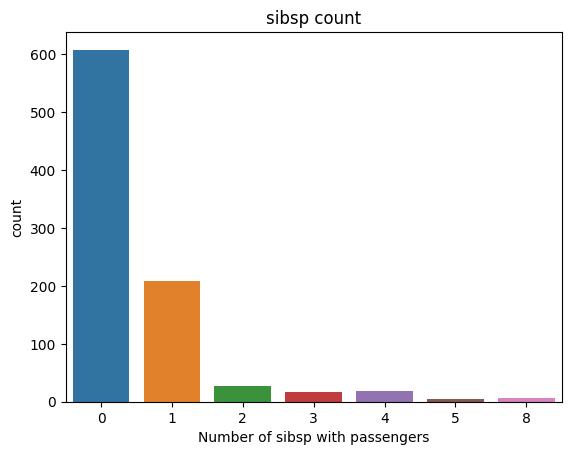

In [20]:
sns.countplot(x=df['sibsp'])
plt.xlabel('Number of sibsp with passengers')
plt.title('sibsp count')
plt.show()

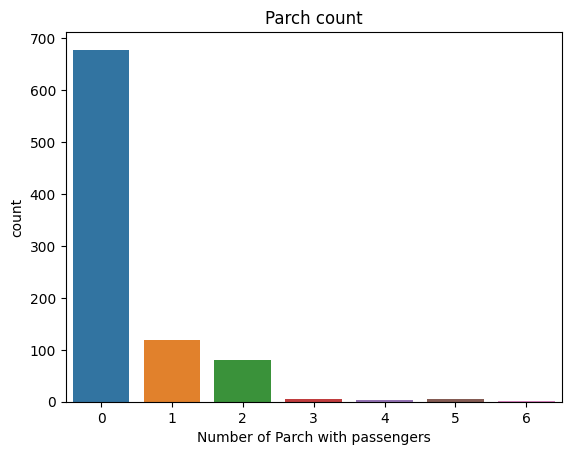

In [21]:
sns.countplot(x=df['parch'])
plt.xlabel('Number of Parch with passengers')
plt.title('Parch count')
plt.show()

c:\Users\dell\miniconda3\envs\python_ML\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

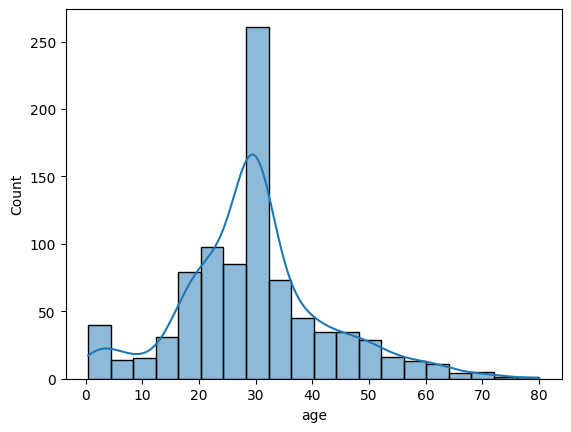

In [22]:
sns.histplot(df['age'], kde=True, bins=20)

In [99]:
px.box(df['age'])

c:\Users\dell\miniconda3\envs\python_ML\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='fare', ylabel='Count'>

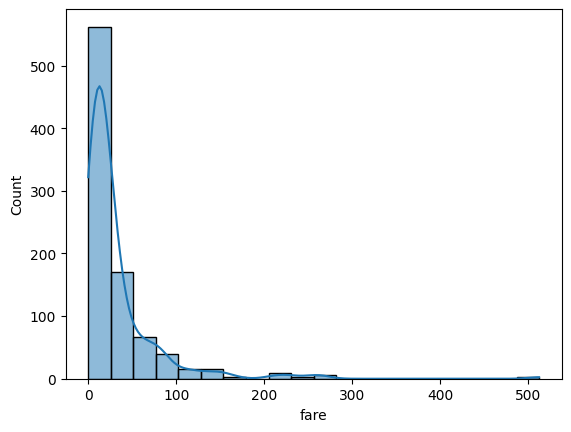

In [23]:
sns.histplot(df, x=df['fare'],bins=20, kde=True)

In [98]:
px.box(df['fare'])

### Insights from the univarient Analysis:
* There is skewness and potential outliers in numeric columns.
* We have seen that the survival rate is very low compare to the deaths.
* The majority of the passengers are traveling alone.
* Most of the passengers are of gender Male (not adult included).
* Majority of the passengers are aged 20 to 35, moreover the childs less then 1 year old are also on Titanic.
* The majority of the passengers are traveling in  3rd class.
* Majorty of the passengers embarked from South hamburg port.
* The majority fare paid between 0 to 40, and highest fare paid is 500.

### Bivarient Analysis:

In [24]:
df.groupby('who')['survived'].value_counts()

who    survived
child  1            49
       0            34
man    0           449
       1            88
woman  1           205
       0            66
Name: count, dtype: int64

<Axes: xlabel='who', ylabel='count'>

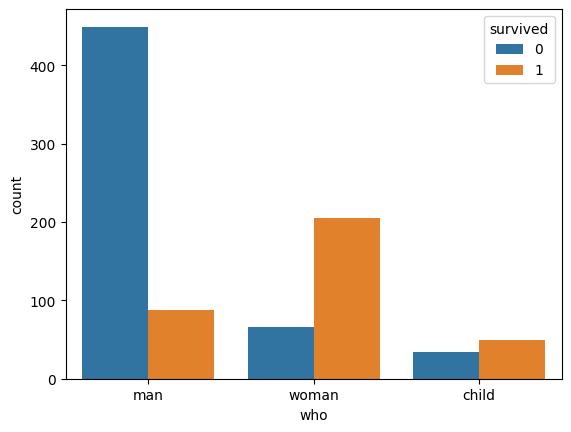

In [74]:
sns.countplot(df, x="who", hue='survived', )

<Axes: xlabel='age', ylabel='fare'>

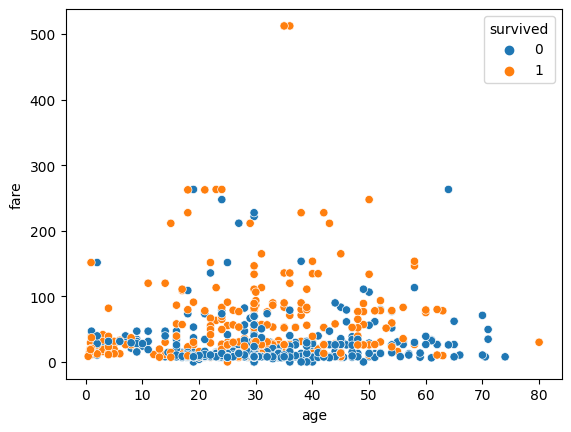

In [71]:
sns.scatterplot(df, x='age', y= 'fare', hue='survived')

In [104]:
df.groupby(df['survived']==1)['fare'].value_counts()

survived  fare    
False     8.0500      38
          7.8958      37
          13.0000     26
          7.7500      22
          26.0000     16
                      ..
True      82.1708      1
          83.4750      1
          106.4250     1
          108.9000     1
          247.5208     1
Name: count, Length: 330, dtype: int64

<Axes: xlabel='embark_town', ylabel='count'>

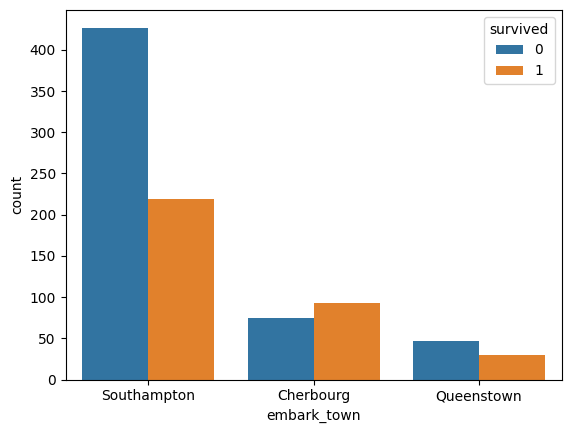

In [80]:
sns.countplot(df, x='embark_town', hue='survived')

In [86]:
pd.crosstab(df.embark_town, df.alive)

alive,no,yes
embark_town,,
Cherbourg,75,93
Queenstown,47,30
Southampton,427,219


c:\Users\dell\miniconda3\envs\python_ML\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\dell\miniconda3\envs\python_ML\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='class', ylabel='count'>

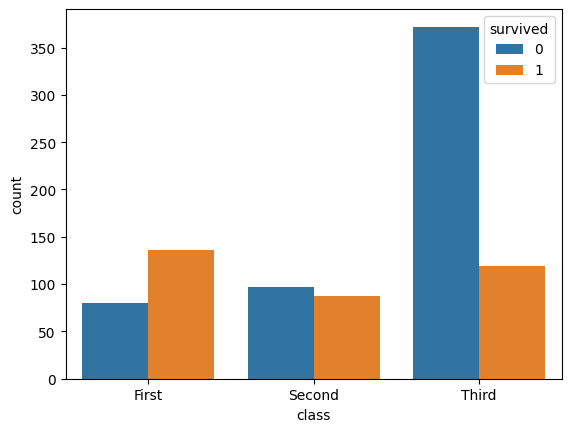

In [25]:
sns.countplot(df, x='class', hue='survived')

In [110]:
pd.crosstab(df['class'], df['survived']) 

survived,0,1
class,,
First,80,136
Second,97,87
Third,372,119


In [117]:
df.groupby(['class', 'embark_town'])['alive'].value_counts()

C:\Users\dell\AppData\Local\Temp\ipykernel_8296\2521653436.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



class   embark_town  alive
First   Cherbourg    yes       59
                     no        26
        Queenstown   no         1
                     yes        1
        Southampton  yes       76
                     no        53
Second  Cherbourg    yes        9
                     no         8
        Queenstown   yes        2
                     no         1
        Southampton  no        88
                     yes       76
Third   Cherbourg    no        41
                     yes       25
        Queenstown   no        45
                     yes       27
        Southampton  no       286
                     yes       67
Name: count, dtype: int64

In [49]:
df['alone']=df['alone'].replace(True,'Yes')


In [51]:
df['alone']=df['alone'].replace(False,'No')


<Axes: xlabel='alone', ylabel='count'>

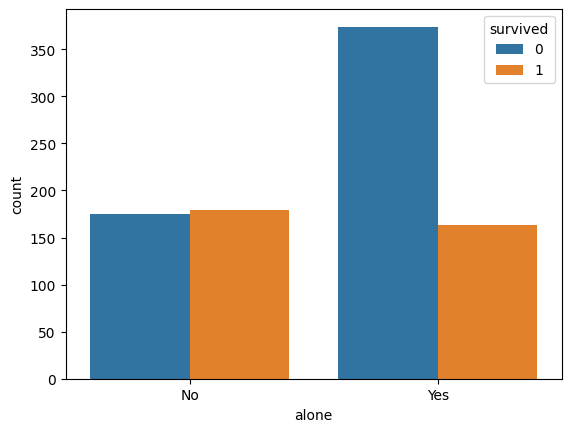

In [58]:
sns.countplot(df, x=df['alone'], hue='survived')

In [59]:
pd.crosstab(df['alone'], df['survived'])

survived,0,1
alone,,
No,175,179
Yes,374,163


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  891 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    object  
dtypes: bool(1), category(1), float64(2), int64(4), object(6)
memory usage: 85.5+ KB


Making new column family size

In [80]:
df['family_size'] = df['sibsp']+df['parch']+1
df['family_size']

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: family_size, Length: 891, dtype: int64

<Axes: xlabel='family_size', ylabel='count'>

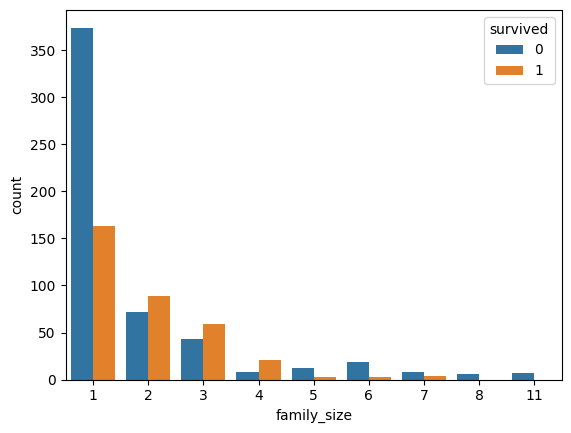

In [88]:
sns.countplot(df, x='family_size', hue='survived')

In [90]:
df.groupby('family_size')['survived'].value_counts()

family_size  survived
1            0           374
             1           163
2            1            89
             0            72
3            1            59
             0            43
4            1            21
             0             8
5            0            12
             1             3
6            0            19
             1             3
7            0             8
             1             4
8            0             6
11           0             7
Name: count, dtype: int64

### Insights From Bivarient Analysis:
* Surviaval rate in woman and childerenis high.
* Plcass 1 passengers have much survival rate.
* Majority of the passengers embarked from South Hampton and much likely are traveling in 1st class.
* Passengers traveling with large Family_size has less survival rate.